In [6]:
mv /Users/tdm/Downloads/exoplanets.csv .

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline as interpolate

exo = pd.read_csv('data/exoplanets.csv')
exo.to_hdf('data/exoplanets.h5','df')
exo = pd.read_hdf('data/exoplanets.h5', 'df')
exo = exo[~exo.NAME.str.contains('PSR')]

m_nep = 0.0539531012
r_nep = 0.35219064

# Set dates for KOIs
# KOI -> 1609: 2011
# -> 2841: 2012
# -> 3149: 2012.5
# -> 4914: 2013
# -> 6251: 2014
# -> 7620: 2015
B11 = exo.KOI < 1610# & kepname
Q6 = exo.KOI <= 2841# & kepname
Q8 = exo.KOI <= 3149# & kepname
Q12 = exo.KOI <= 4914# & kepname
Q16 = exo.KOI <= 6251# & kepname
Q17 = exo.KOI <= 7620# & kepname

exo.loc[Q17, 'DATE'] = 2015
exo.loc[Q16, 'DATE'] = 2014
exo.loc[Q12, 'DATE'] = 2013
exo.loc[Q8, 'DATE'] = 2012.5
exo.loc[Q6, 'DATE'] = 2012
exo.loc[B11, 'DATE'] = 2011

kepname = (exo.NAME.str.contains('Kepler')).values
koiname = (exo.NAME.str.contains('KOI')).values

kepler = exo[kepname].copy()
koi = exo[koiname].copy()
all_kepler = exo[koiname | kepname].copy()
no_kepler = exo[~(kepname | koiname)].copy()

/Users/tdm/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4,5,10,11,17,18,23,24,26,27,30,33,38,39,44,45,50,51,56,57,62,63,70,71,73,74,79,80,81,82,88,89,95,96,105,106,109,110,115,116,124,125,130,131,137,143,144,149,150,159,160,161,162,172,173,174,179,180,182,188,189,195,196,201,202,205,206,211,212,217,218,223,224,229,230,235,236,241,242,247,248,253,254,259,260,265,266,268,269,270,271,273,278,279,284,285,290,291,294,295,301,302,304,305,310,311) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/tdm/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:1138: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block2_values] [items->['AREF', 'AURL', 'ARREF', 'ARURL', 'BREF', 'BURL', 'BIGOMREF', 'BIGOMURL', 'BINARYREF', 'BINARYURL', '

In [8]:
exo.query("STARDISCMETH=='Timing'")[['NAME','DATE']]

,NAME,DATE
4,NN Ser d,2010.0
95,Kepler-79 b,2011.0
209,NN Ser c,2010.0
577,Kepler-87 b,2011.0
1395,Kepler-79 c,2011.0
1499,Kepler-87 c,2011.0


In [9]:
exo[['DATE','NAME']].head()

,DATE,NAME
0,2011.0,Kepler-107 d
1,2011.0,Kepler-427 b
2,2009.0,WASP-14 b
3,2011.0,Kepler-50 b
4,2010.0,NN Ser d


In [315]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    


def cum_draw(df=exo,color='k',mindate=1995,maxdate=2015,ax=None,norm=False,fill=True, kois=False,
             alpha=0.2,interp=False,kepler=False,kepsmall=False,label=False,xylabel=(0.1,0.8),
            zorder=0):
    if ax is None:
        fig, ax = plt.subplots(1,1)
    else:
        fig = ax.figure

    dates = np.sort(df.DATE)
    ds = np.unique(dates).astype(float)
    ds = ds[ds <= maxdate]
    ns = np.zeros(len(ds))
    for i,d in enumerate(ds):
        ns[i] = (dates<=d).sum()
    if norm:
        ns /= ns.max()
        ns *= norm
    
    if interp:
        dgrid = np.arange(mindate,maxdate,0.1)
        fn = interpolate(ds,ns,s=0)
        y1 = fn(dgrid)
        y2 = -y1
    else:
        dgrid = ds
        y1 = ns
        y2 = -ns
    #ax.plot(dgrid,y1,color=color)
    #ax.plot(dgrid,y2,color=color)
    ax.fill_between(dgrid,y1,y2,alpha=alpha,color=color, zorder=zorder)
    ax.set_xlim(xmin=mindate,xmax=maxdate)
    ax.set_yticks([])
    
    date_ticks = np.arange(mindate,maxdate+1,2)
    
    #for d in date_ticks:
    #    ax.axvline(d, ls=':', color='k', alpha=0.2)
    ax.set_xticks(date_ticks)
    ax.tick_params(labelsize=16)
    
    ax.spines["top"].set_visible(False)    
    #ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)  
    
    ax.get_xaxis().tick_bottom()    
    ax.xaxis.set_tick_params(width=3, length=10)
    
    if label:
        if type(label)==str:
            label = '%s (%i)' % (label,ns.max())
        else:
            label = '{:.0f}'.format(ns.max())
        plt.annotate(label,xy=xylabel,xycoords='axes fraction',fontsize=18,color=color)

    #print ns, ds
    return fig
        

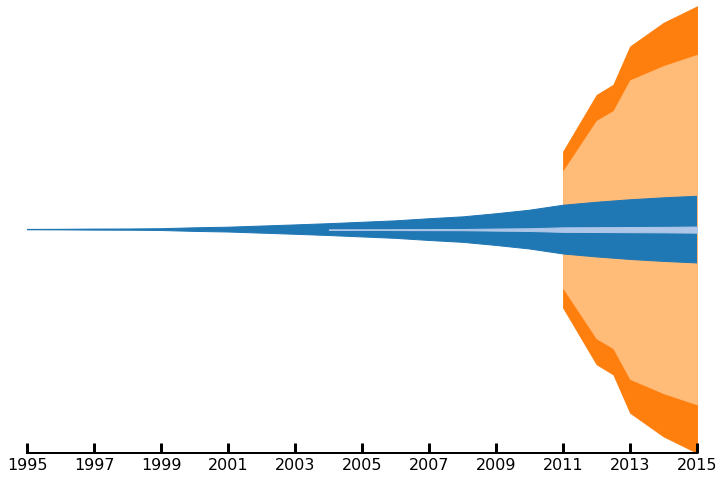

In [323]:
m_nep = 0.0539531012
r_nep = 2.4622e9 / 6.9911e9

no_kepler_small = no_kepler.query('MASS < {}'.format(m_nep))
all_kepler_small = all_kepler.query('R < {}'.format(r_nep))

fig, ax = plt.subplots(1,1, figsize=(12,8))

subsets = [no_kepler, no_kepler_small, all_kepler, all_kepler_small]
n = len(subsets)

for i,d in enumerate(subsets):
    fig = cum_draw(d, ax=ax, color=tableau20[i], alpha=1, zorder=-len(d));

fig.savefig('planet_wedge.png', transparent=True, bbox_inches="tight")
    

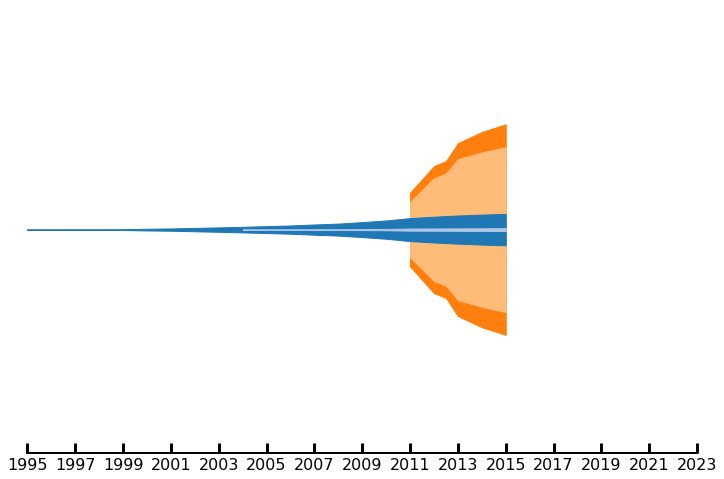

In [324]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

subsets = [no_kepler, no_kepler_small, all_kepler, all_kepler_small]
n = len(subsets)

for i,d in enumerate(subsets):
    fig = cum_draw(d, ax=ax, color=tableau20[i], alpha=1, zorder=-len(d), maxdate=2023);

ax.set_ylim((-10000,10000))
fig.savefig('planet_wedge_future.png', transparent=True, bbox_inches="tight");
    

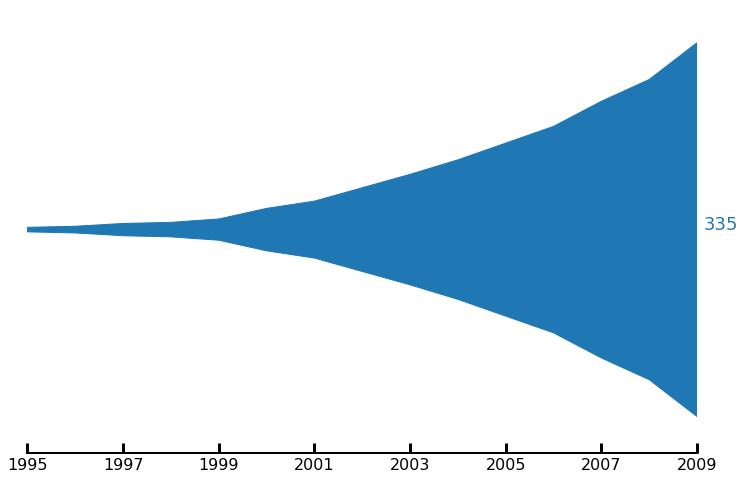

In [325]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

cum_draw(no_kepler, maxdate=2009, ax=ax, color=tableau20[0], alpha=1, label=True, xylabel=(1.01, 0.5))
plt.savefig('prekepler_wedge_all.png', transparent=True, bbox_inches='tight')

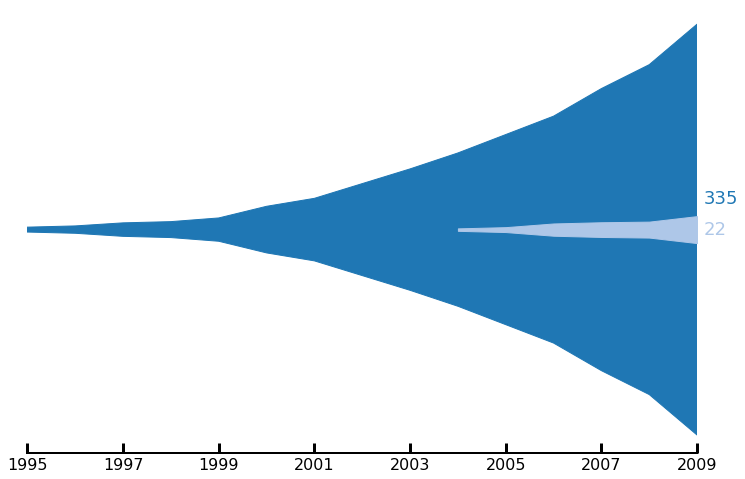

In [326]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

subsets = [no_kepler, no_kepler_small]

for i,d in enumerate(subsets):
    cum_draw(d, maxdate=2009, ax=ax, color=tableau20[i], alpha=1, label=True,
            xylabel=(1.01,0.56-i*0.07))
ax.set_ylim((-708/2-10,708/2+10));

fig.savefig('prekepler_wedge.png', transparent=True, bbox_inches="tight")

In [302]:
len(no_kepler_small.query('DATE<=2009'))

25

In [303]:
len(no_kepler.query('DATE <= 2009'))

338

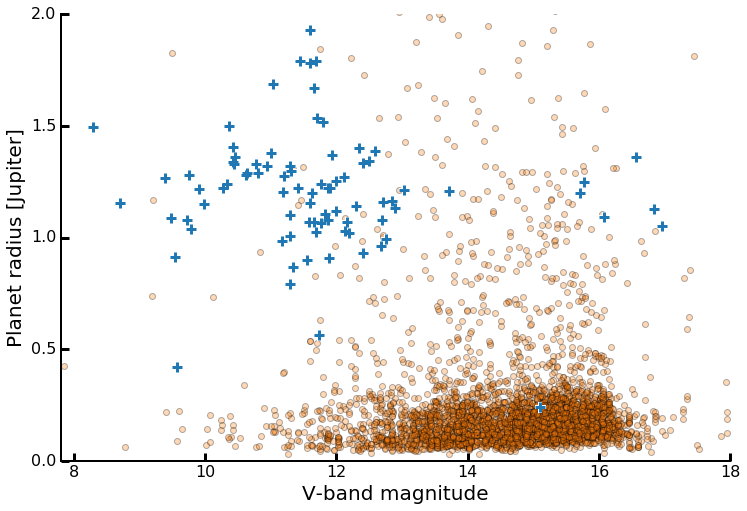

In [295]:
from keputils import koiutils as ku
from astropy import constants as const

RJUP = const.R_jup.cgs.value
REARTH = const.R_earth.cgs.value

DR24 = ku.DR24.query('koi_disposition != "FALSE POSITIVE"')
DR24.Vmag = DR24.koi_gmag - 0.59*(DR24.koi_gmag - DR24.koi_rmag) - 0.01

fig, ax = plt.subplots(1,1, figsize=(12,8))

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)  
#ax.spines["left"].set_visible(False)    
#ax.spines["bottom"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

ground_pre_kepler = ~(exo.NAME.str.contains('Kepler') |
                       exo.NAME.str.contains('KOI') |
                       exo.NAME.str.contains('CoRoT')) & (exo.DATE < 2012) & (exo.STARDISCMETH=='Transit')

ax.plot(exo[ground_pre_kepler].V, exo[ground_pre_kepler].R, '+', color='w', ms=11, mew=4, zorder=2)
ax.plot(exo[ground_pre_kepler].V, exo[ground_pre_kepler].R, '+', color=tableau20[0], ms=10, mew=3, zorder=2)
ax.plot(DR24.Vmag, DR24.koi_prad*REARTH/RJUP, 'o', color=tableau20[2], mew=1, alpha=0.3, zorder=1)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xlim(xmin=7.8, xmax=18)
ax.xaxis.set_tick_params(width=3, length=8)
ax.yaxis.set_tick_params(width=3, length=8)
ax.tick_params(labelsize=16)

ax.set_xlabel('V-band magnitude', size=20);
ax.set_ylabel('Planet radius [Jupiter]', size=20);
fig.savefig('ground_vs_kep.png', transparent=True, bbox_inches="tight")

In [257]:
5000./55000

0.09090909090909091

In [261]:
3e10/55000. / 1e5

5.454545454545454

In [265]:
1e3/2e5

0.005

In [319]:
1e9*0.2 * 0.01 * 0.1

200000.0

In [3]:
for c in exo.columns:
    print(c)

A
AUPPER
ALOWER
UA
AREF
AURL
AR
ARUPPER
ARLOWER
UAR
ARREF
ARURL
ASTROMETRY
B
BUPPER
BLOWER
UB
BREF
BURL
BIGOM
BIGOMUPPER
BIGOMLOWER
UBIGOM
BIGOMREF
BIGOMURL
BINARY
BINARYREF
BINARYURL
BMV
CHI2
COMP
DATE
DEC
DEC_STRING
DENSITY
DENSITYUPPER
DENSITYLOWER
UDENSITY
DENSITYREF
DENSITYURL
DEPTH
DEPTHUPPER
DEPTHLOWER
UDEPTH
DEPTHREF
DEPTHURL
DIST
DISTUPPER
DISTLOWER
UDIST
DISTREF
DISTURL
DR
DRUPPER
DRLOWER
UDR
DRREF
DRURL
DVDT
DVDTUPPER
DVDTLOWER
UDVDT
DVDTREF
DVDTURL
EANAME
EAURL
ECC
ECCUPPER
ECCLOWER
UECC
ECCREF
ECCURL
EOD
ETDNAME
ETDURL
FE
FEUPPER
FELOWER
UFE
FEREF
FEURL
FIRSTREF
FIRSTURL
FREEZE_ECC
GAMMA
GAMMAUPPER
GAMMALOWER
UGAMMA
GAMMAREF
GAMMAURL
GL
GRAVITY
GRAVITYUPPER
GRAVITYLOWER
UGRAVITY
GRAVITYREF
GRAVITYURL
H
HD
HIPP
HR
I
IUPPER
ILOWER
UI
IREF
IURL
IMAGING
J
JSNAME
EPEURL
K
KUPPER
KLOWER
UK
KREF
KURL
KOI
KS
KP
LAMBDA
LAMBDAUPPER
LAMBDALOWER
ULAMBDA
LAMBDAREF
LAMBDAURL
LOGG
LOGGUPPER
LOGGLOWER
ULOGG
LOGGREF
LOGGURL
MASS
MASSUPPER
MASSLOWER
UMASS
MASSREF
MASSURL
MICROLENSING
MSINI


In [4]:
exo.PLANETDISCMETH.unique()

array(['Transit', 'Timing', 'RV', 'Microlensing', nan, 'Imaging',
       'Transit Timing Variations'], dtype=object)

In [12]:
exo.NAME.str.contains('Kepler').sum()

933

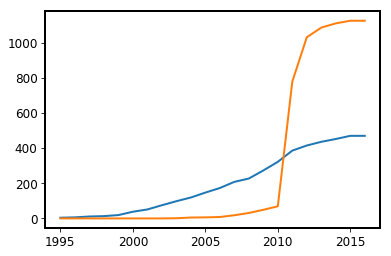

In [11]:
min_date = 1995
max_date = 2017
dates = np.arange(min_date, max_date)

rv_cum = [len(exo.query('PLANETDISCMETH=="RV" and DATE <= {}'.format(d))) for d in dates]
transit_cum = [len(exo.query('PLANETDISCMETH=="Transit" and DATE <= {}'.format(d))) for d in dates]

fig, ax = plt.subplots(1,1)
ax.plot(dates, rv_cum)
ax.plot(dates, transit_cum)